In [38]:
import base64
import struct
import matplotlib.pyplot as plt
import pandas as pd
f = open("hrmlog_text.txt")
lines = f.readlines()
hrmraw = lines[2]

data = base64.b64decode(hrmraw.split(":")[1])
data = list(struct.iter_unpack(">Ihhhh",data))
df = pd.DataFrame(data,columns=["time","ppg","x","y","z"])

<Axes: >

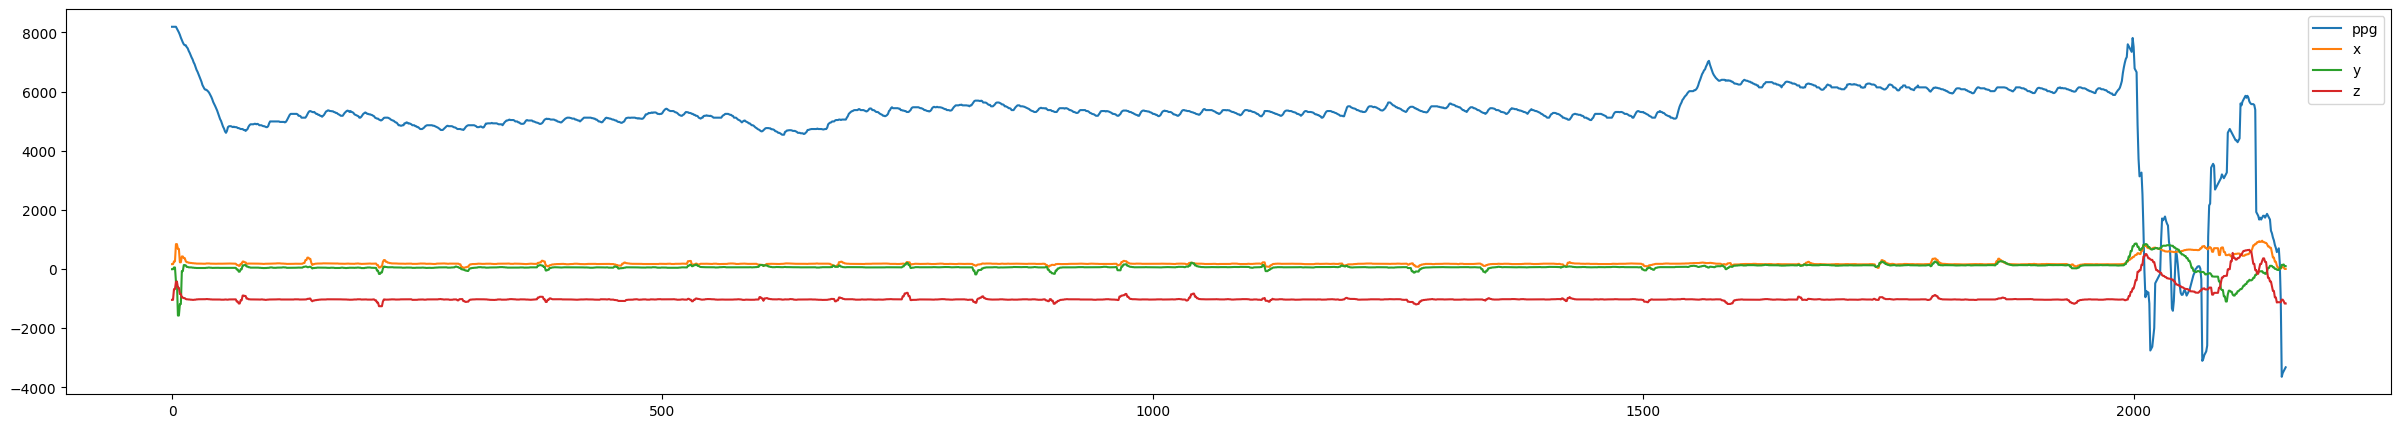

In [39]:
df[["ppg","x","y","z"]].plot(figsize=(30,5))

(1693311150,)

In [146]:


import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt desc")
    all_data = res.fetchall()
    for t in all_data[0:5]:
        print(t)
    




('24fd6648e46d49ab9ca4a4a5f852e367', '6865616C74686C6F6732333A64F526A0000000C464F526AC000000C40A68726D6C6F6732333A')
('8e625c5360b34ed9873a462bd7572928', '6865616C74686C6F6732333A64F52661000000CB64F52670000000CC0A68726D6C6F6732333A')
('4ddb6e5188ac43cab59dbc612ed030a5', '6865616C74686C6F6732333A64F52623000000DD64F52634000000E80A68726D6C6F6732333A')
('af3d3de487c041f0949ca48a0eefe7db', '6865616C74686C6F6732333A64F525E2000000B064F525F8000000B00A68726D6C6F6732333A64F525FC590064F525FC700064F525FD6B0064F525FE690064F525FE650064F5250BFE610064F526005D0064F5260B0C5D0064F5260B0C5D0064F5260B0D5D0064F5260B0D5D0064F5260B0D5D0064F52603640064F52604640064F526046E0064F52604740064F526057E0064F526057A0064F52606790064F52607780064F52608780064F52608780064F52609790064F526097F0064F5260B0F7A0064F5260B0F7A0064F5260B0F7A0064F5260B0B790064F5260B0B760064F5260C760064F5260D6F0864F5260E690064F5260F630964F52610660064F52610660064F52611640064F52612620064F52613610064F52614630064F52614600064F526155C0F64F52616560064F526175

healthlog26 7 [(1693832134, 0, 195, 0), (1693832160, 0, 183, 0), (1693832220, 0, 200, 0), (1693832279, 0, 209, 0), (1693832280, 0, 208, 0), (1693832339, 0, 216, 0), (1693832340, 0, 216, 0)]
hrmreg1693832156317 192 [(1693832161, 78, 0), (1693832161, 75, 0), (1693832163, 71, 0), (1693832163, 71, 0), (1693832164, 75, 0), (1693832165, 73, 0), (1693832166, 72, 0), (1693832166, 85, 0), (1693832167, 77, 12), (1693832168, 72, 54), (1693832169, 68, 83), (1693832170, 66, 96), (1693832171, 66, 87), (1693832172, 66, 87), (1693832173, 66, 96), (1693832174, 64, 91), (1693832175, 64, 91), (1693832176, 62, 99), (1693832177, 62, 100), (1693832178, 61, 100), (1693832179, 61, 100), (1693832180, 61, 100), (1693832181, 61, 99), (1693832182, 60, 100), (1693832183, 60, 100), (1693832184, 60, 100), (1693832185, 60, 100), (1693832186, 60, 100), (1693832187, 60, 100), (1693832188, 60, 100), (1693832189, 60, 100), (1693832190, 60, 100), (1693832191, 60, 100), (1693832191, 61, 100), (1693832192, 61, 100), (169383

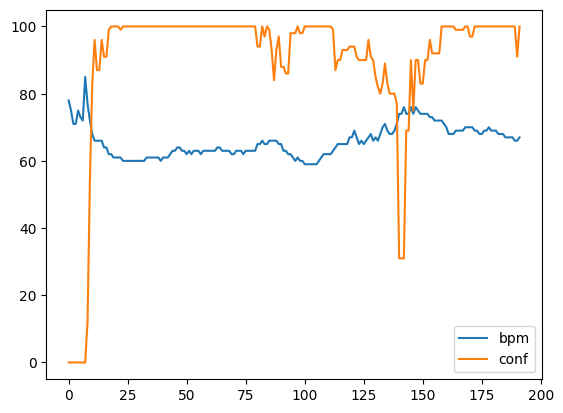

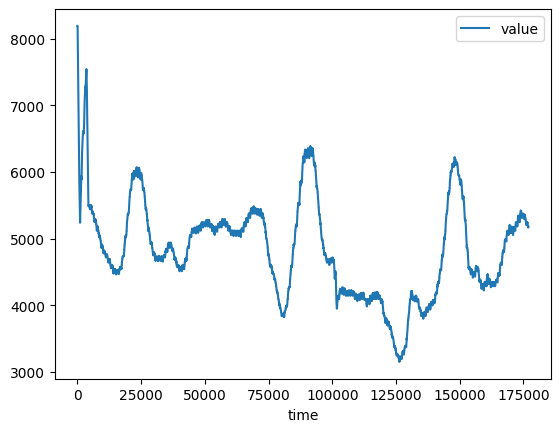

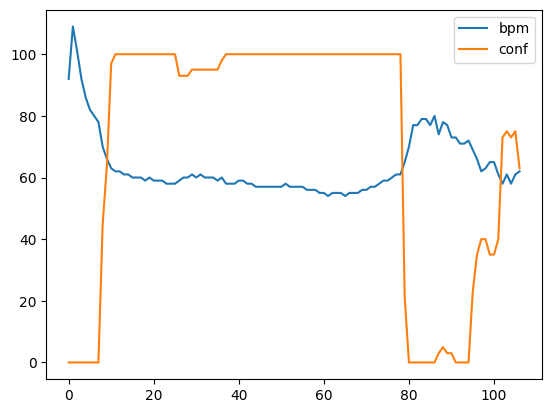

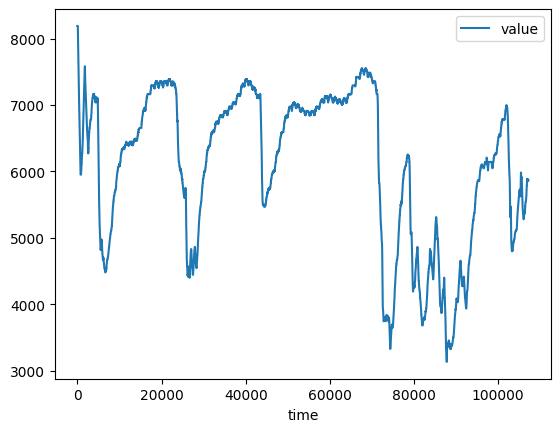

In [243]:


import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
import base64
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt desc")
    all_data = res.fetchall()
    for t in all_data[0:10]:
        files = bytearray.fromhex(t[1]).decode().split("\n")
        for f in files:
            parts = f.split(":")
            filename = parts[0]
            data = base64.b64decode(parts[1])
            if "hrmraw" in filename:
                data = list(struct.iter_unpack(">HB",data))
                df_raw = pd.DataFrame(data,columns=["value","time_delta"])
                df_raw["time"] = df_raw.time_delta.cumsum()
                
                if(len(data) > 0): df_raw.plot(x="time",y="value")
                print(df_raw.time_delta.mean())
            elif "hrmreg" in filename:
                data = list(struct.iter_unpack(">IBB",data))
                df_reg = pd.DataFrame(data,columns=["time","bpm","conf"])
                if(len(data) > 0): df_reg[["bpm","conf"]].plot()
            elif "healthlog" in filename:
                data = list(struct.iter_unpack(">IHHB",data))
            print(filename, len(data), data)
            
        print()

        